# Life Expectancy

The objective of this notebook is to predict life expectancy.

The dataset is from https://www.kaggle.com/kumarajarshi/life-expectancy-who.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
plt.style.use("bmh")

In [2]:
# Load data
life_data = pd.read_csv("Life Expectancy Data.csv")

In [3]:
life_data.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [4]:
life_data.shape

(2938, 22)

In [5]:
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### Variable notes:

* **Country:** Country
* **Year:** Year
* **Status:** Developed or Developing status
* **Life expectancy:** Life Expectancy in age
* **Adult Mortality:** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* **infant deaths:** Number of Infant Deaths per 1000 population
* **Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* **percentage expenditure:** Expenditure on health as a percentage of Gross Domestic Product per capita(%)
* **Hepatitis B:** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Measles:** Measles - number of reported cases per 1000 population
* **BMI:** Average Body Mass Index of entire population
* **under-five deaths:** Number of under-five deaths per 1000 population
* **Polio:** Polio (Pol3) immunization coverage among 1-year-olds (%)
* **Total expenditure:** General government expenditure on health as a percentage of total government expenditure (%)
* **Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **HIV/AIDS:** Deaths per 1 000 live births HIV/AIDS (0-4 years)
* **GDP:** Gross Domestic Product per capita (in USD)
* **Population:** Population of the country
* **thinness  1-19 years:** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
* **thinness 5-9 years:** Prevalence of thinness among children for Age 5 to 9(%)
* **Income composition of resources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Schooling:** Number of years of Schooling(years)

In [6]:
# check missing data
life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
# fill missing data
for column in life_data.columns:
    if life_data[column].isnull().sum() != 0:
        life_data[column].fillna(life_data[column].mean(), inplace=True)

In [8]:
life_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Let's see how each characteristic affects life expectancy.

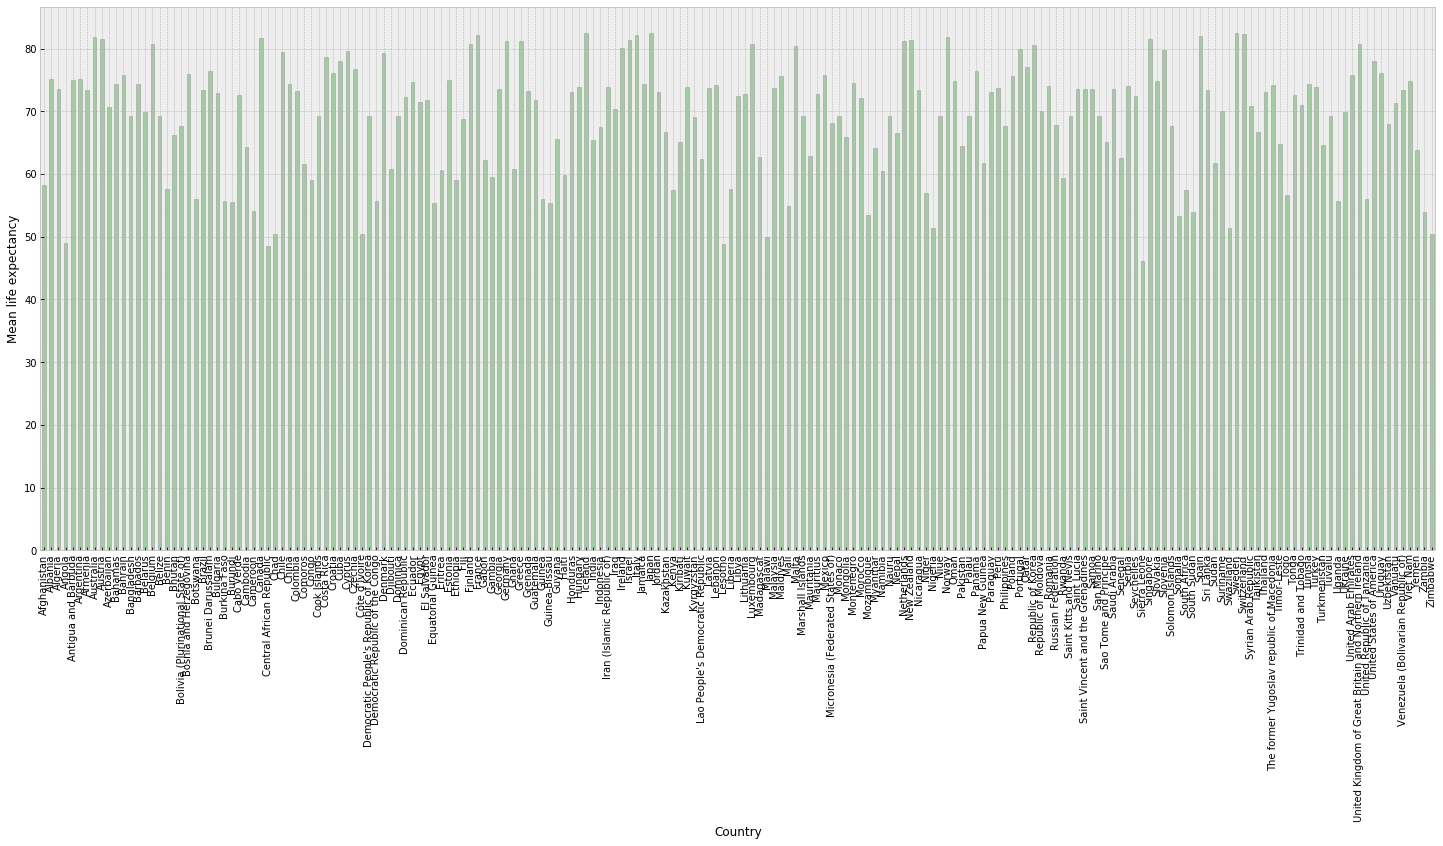

In [9]:
fig, ax = plt.subplots(figsize=(25, 10))
g1 = life_data.groupby("Country")["Life expectancy "].mean()
g1.plot(kind="bar", alpha=0.3, ec="k", color="green")
plt.ylabel("Mean life expectancy")
plt.show()

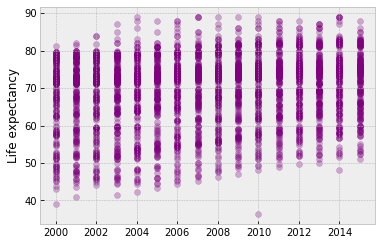

In [10]:
plt.scatter(x=life_data["Year"], y=life_data["Life expectancy "], color="purple", alpha=0.3)
plt.ylabel("Life expectancy")
plt.show()

Over the years life expectancy has been growing, because of the development in health sector.

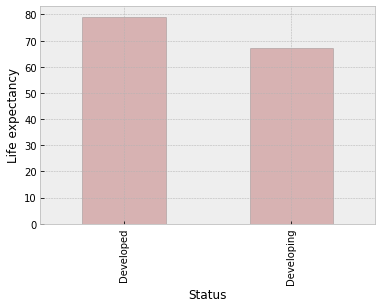

In [11]:
g2 = life_data.groupby("Status")["Life expectancy "].mean()
g2.plot(kind="bar", alpha=0.3, ec="k", color="brown")
plt.ylabel("Life expectancy")
plt.show()

Developed countries have higher life expectancy.

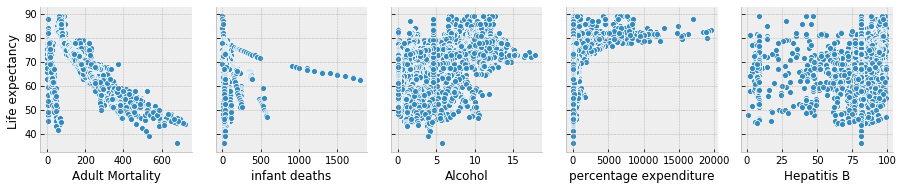

In [12]:
sns.pairplot(life_data, x_vars=["Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", "Hepatitis B"], y_vars=["Life expectancy "])

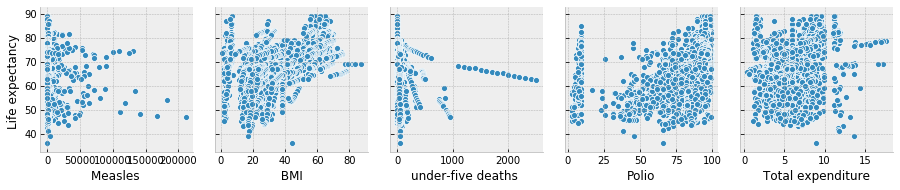

In [13]:
sns.pairplot(life_data, x_vars=["Measles ", " BMI ", "under-five deaths ", "Polio", "Total expenditure"], y_vars=["Life expectancy "])

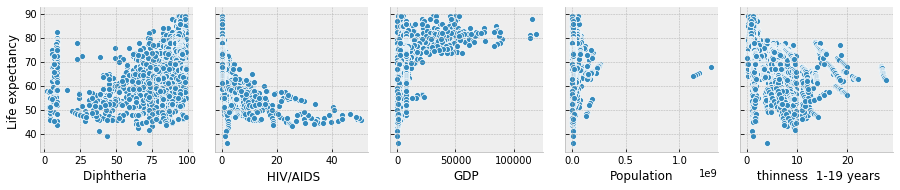

In [14]:
sns.pairplot(life_data, x_vars=["Diphtheria ", " HIV/AIDS", "GDP", "Population", " thinness  1-19 years"], y_vars=["Life expectancy "])

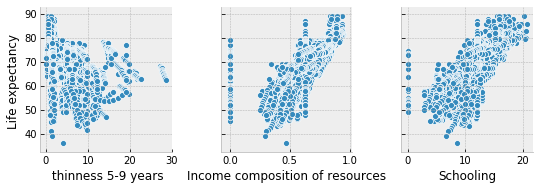

In [15]:
sns.pairplot(life_data, x_vars=[" thinness 5-9 years", "Income composition of resources", "Schooling"], y_vars=["Life expectancy "])

Let's see the correlations between the variables.
* A value near 1.0 indicates a positive correlation.
* A value near -1.0 indicates a negative correlation.
* And a value near zero indicates the absence of any correlation.

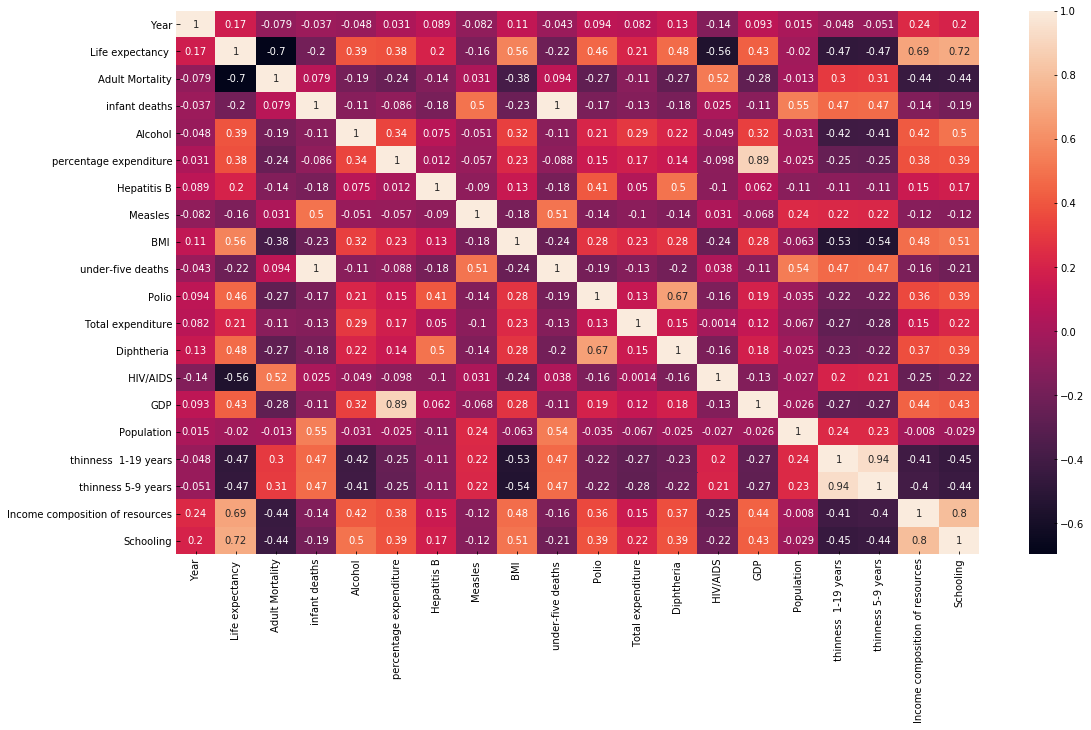

In [16]:
corrMatrix = life_data.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corrMatrix, annot=True)

In [17]:
life_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [18]:
# Since Country and Status columns aren't numerical values, I will transform them

print(life_data["Country"].unique())
letters = life_data["Country"].unique()
numbers = list(range(len(life_data["Country"].unique())))
d = dict(zip(letters, numbers))
life_data["Country"] = life_data["Country"].map(d)
print(life_data["Country"].unique())

print(life_data["Status"].unique())
mappingstatus = {"Developing": 0, "Developed": 1}
life_data["Status"] = life_data["Status"].map(mappingstatus)
print(life_data["Status"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

In [19]:
life_data.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.091219,2007.518720,0.174268,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,56.250042,4.613841,0.379405,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,0.000000,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,0.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,93.000000,2008.000000,0.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,145.000000,2012.000000,0.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,192.000000,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
# Now I will make all variables range from 0 to 1, because machine learning algorithms work better that way.

for column in life_data.columns:
    maxcolumn = life_data[column].max()
    if maxcolumn > 1:
        life_data[column] = life_data[column] / maxcolumn

In [21]:
life_data.describe()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.495267,0.996287,0.174268,0.777808,0.227934,0.016836,0.257575,0.037898,0.817580,0.011403,...,0.833840,0.337397,0.831556,0.034429,0.062793,9.856849e-03,0.174719,0.170291,0.627551,0.579362
std,0.292969,0.002290,0.379405,0.106827,0.171619,0.065515,0.219154,0.102049,0.228150,0.054044,...,0.235880,0.136379,0.238789,0.100351,0.110233,4.159298e-02,0.158647,0.156738,0.204820,0.157700
min,0.000000,0.992556,0.000000,0.407865,0.001383,0.000000,0.000560,0.000000,0.010101,0.000000,...,0.030303,0.021023,0.020202,0.001976,0.000014,2.627797e-08,0.003610,0.003497,0.000000,0.000000
25%,0.239583,0.994541,0.000000,0.710112,0.102351,0.000000,0.061136,0.000241,0.817580,0.000000,...,0.787879,0.248295,0.787879,0.001976,0.004871,3.237734e-04,0.057762,0.055944,0.504250,0.497585
50%,0.484375,0.996526,0.000000,0.808989,0.199170,0.001667,0.232792,0.003332,0.878788,0.000080,...,0.939394,0.337397,0.939394,0.001976,0.026152,2.841058e-03,0.122744,0.118881,0.662000,0.584541
75%,0.755208,0.998511,0.000000,0.849438,0.313970,0.012222,0.413542,0.022666,0.969697,0.001698,...,0.979798,0.416477,0.979798,0.015810,0.062793,9.856849e-03,0.256318,0.251748,0.772000,0.681159
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,0.948000,1.000000


In [22]:
# Split data
life_data_X = life_data.drop("Life expectancy ", axis=1)
life_data_y = life_data["Life expectancy "]

In [23]:
Xtrain, Xtest, ytrain, ytest = train_test_split(life_data_X, life_data_y, test_size=0.3)

Since this is a supervised learning problem, and the y values are continuous, I will use Linear Regression.

In [24]:
linearparam = {"fit_intercept": [True, False], "normalize": [True, False], "copy_X": [True, False]}
lineargrid = GridSearchCV(LinearRegression(), linearparam, cv=10)
lineargrid.fit(Xtrain, ytrain)
print("Best Linear Regression estimator:", lineargrid.best_estimator_)

Best Linear Regression estimator: LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)


In [25]:
ypredictedlinear = lineargrid.best_estimator_.predict(Xtest)

mae = metrics.mean_absolute_error(ytest, ypredictedlinear)
mse = metrics.mean_squared_error(ytest, ypredictedlinear)
r2 = metrics.r2_score(ytest, ypredictedlinear)

print("Linear Regression performance:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 score:", r2)

Linear Regression performance:
MAE: 0.03356005485833053
MSE: 0.0019678973832186406
R2 score: 0.8281822212540024
